In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/data_cleaned1.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   int64  
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 529.9 KB


In [5]:
df

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0,0,1,0,312.0,175.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,40.0,0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


In [6]:
df['cigsPerDay'] = df['cigsPerDay'].astype(int)
df['cigsPerDay'].unique()

array([ 0, 20, 30, 23, 15,  9, 10,  5, 35, 40,  1,  3,  2, 12,  4, 18, 25,
       14,  8, 13, 11,  7,  6, 38, 29, 17, 16, 19])

## SPLIT THE DATA 

In [7]:
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

In [8]:
X

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1,0,0,1,0,312.0,175.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,40,0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4235,0,48,2.0,1,20,0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1.0,1,15,0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0


In [9]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [10]:
#total propotion of target feature 
df['TenYearCHD'].value_counts(normalize=True)*100

TenYearCHD
0    84.804153
1    15.195847
Name: proportion, dtype: float64

    IMBALANCED DATA ARE FOUND , WILL BE SOLVED BY CLASSWEIGHT PARAMETER OF ML MODELS 

## Train test split

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [12]:
X_train

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1896,0,51,1.0,1,20,0,0,0,0,300.0,128.0,78.0,26.69,65.0,97.0
911,0,35,3.0,1,5,0,0,0,0,170.0,125.0,75.0,23.10,110.0,75.0
3143,0,58,1.0,1,15,0,0,1,0,275.0,140.0,78.0,19.18,78.0,74.0
1947,0,63,1.0,1,10,1,0,1,0,213.0,175.0,92.0,26.87,119.0,63.0
1822,1,48,1.0,1,35,0,0,0,0,188.0,120.0,82.5,31.67,80.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,1,36,2.0,0,0,0,0,0,0,197.0,115.0,66.0,20.42,68.0,77.0
3040,1,57,1.0,0,0,0,0,1,0,287.0,149.0,86.0,26.33,62.0,65.0
2561,0,45,4.0,0,0,0,0,0,0,253.0,135.0,85.0,24.35,78.0,84.0
3824,0,39,3.0,1,8,0,0,0,0,192.0,109.0,66.0,23.36,64.0,84.0


In [13]:
y_train

1896    0
911     0
3143    1
1947    0
1822    0
       ..
3518    0
3040    0
2561    0
3824    0
2273    0
Name: TenYearCHD, Length: 2966, dtype: int64

### Stratify in Train-Test Split

When splitting the dataset into training and testing sets, **`stratify`** ensures the class proportions in the train and test sets are consistent with the original dataset.

---

#### **Without Stratify:**
- Splits the data randomly.
- Class proportions in train/test sets may differ from the original dataset.
- Example:
  - Original Dataset: Class 0 = 80%, Class 1 = 20%
  - Train Set: Class 0 = 85%, Class 1 = 15% (random imbalance)
  - Test Set: Class 0 = 75%, Class 1 = 25% (random imbalance)

---

#### **With Stratify:**
- Maintains the same class proportions as the original dataset.
- Example:
  - Original Dataset: Class 0 = 80%, Class 1 = 20%
  - Train Set: Class 0 = 80%, Class 1 = 20%
  - Test Set: Class 0 = 80%, Class 1 = 20%

---

#### **Why Use Stratify?**
1. **Consistency:** Ensures the train and test sets represent the original dataset.
2. **Fair Evaluation:** Prevents uneven splits, especially important for imbalanced datasets.

---


# Feature selection 

### CORRELATION PLOT 

<Axes: >

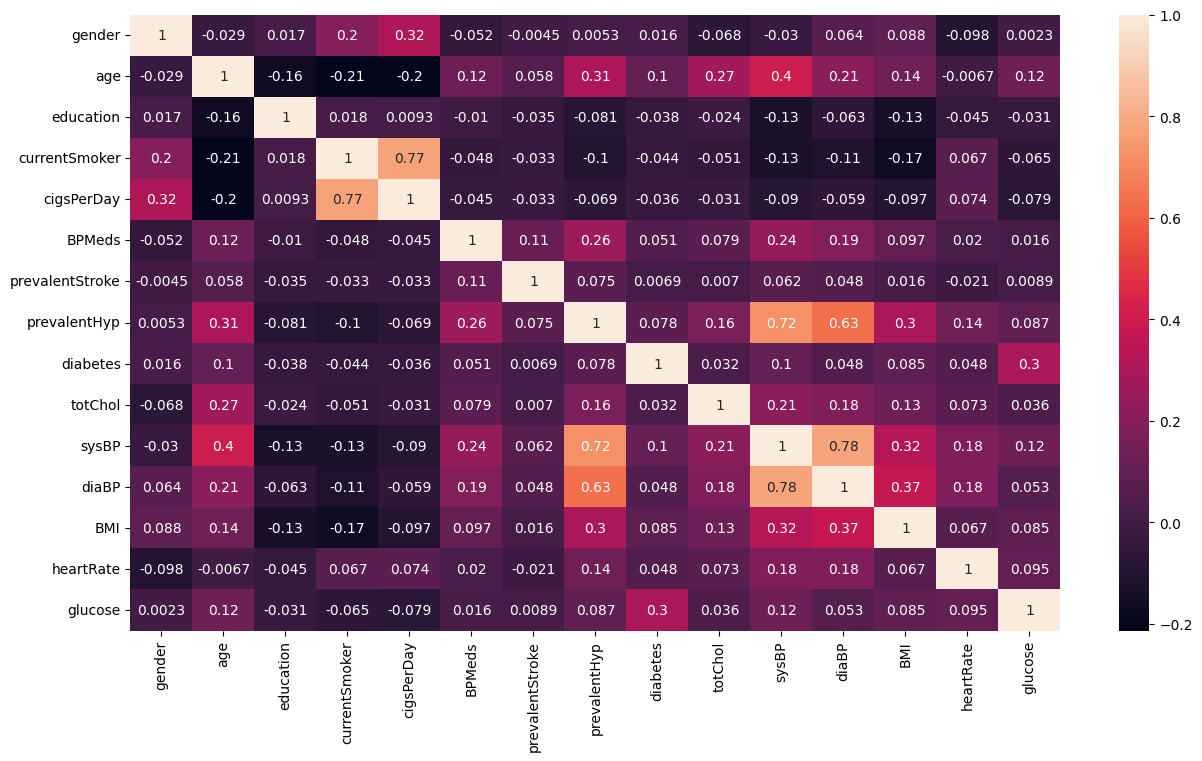

In [14]:
corr = X.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

### TREE-BASED FEATURE IMPORTANCE BY RANDOM FOREST 

In [15]:
randomF = RandomForestClassifier(n_estimators=100,random_state=42)
randomF.fit(X_train,y_train)

feature_importance = randomF.feature_importances_

df_features = pd.DataFrame({'features':X.columns,'importance':feature_importance})
df_features = df_features.sort_values(by='importance',ascending=False)
df_features

,features,importance
12,BMI,0.134192
1,age,0.129201
10,sysBP,0.127879
9,totChol,0.116213
11,diaBP,0.112936
14,glucose,0.104826
13,heartRate,0.101149
4,cigsPerDay,0.051652
2,education,0.040440
0,gender,0.022639


### Observation

  -  SOME FEATURES HAVE LESS IMPORTANCE BPmedS DIABETES PREVALENTSTROKE 
  -  SYSBP WITH DIABP , SYSYBP WITH PREVALENTSTROKE , PREVALENTSTROKE WITH DIABP ARE SHOWN CORRELATED 
  -  REMOVE THE FEATURE BY LOW IMPORTANCE FEATURES
  -  BOTH SYSBP AND DIABP ARE CORRELATED 0.78 BUT BOTH OF THEM ARE HEIGHER IMPPORATNCE FEATURE, TO ENSURE COLLINEARITY USE VIF

#### VARIANCE INFLATIONN FACTORS BY (sysBP and DiaBP)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
BloodPressure = X[['sysBP','diaBP']]

df_BloodPressure = pd.DataFrame({'Bp':BloodPressure.columns})
df_BloodPressure['VIF'] = [variance_inflation_factor(BloodPressure.values,i) for i in range(BloodPressure.shape[1])]
df_BloodPressure

,Bp,VIF
0,sysBP,119.058979
1,diaBP,119.058979


In [17]:
df.corr()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1.000000,-0.028979,0.017205,0.197596,0.316019,-0.051545,-0.004546,0.005313,0.015708,-0.068464,-0.029871,0.063648,0.087844,-0.098321,0.002311,0.088428
age,-0.028979,1.000000,-0.163547,-0.213748,-0.196475,0.120955,0.057655,0.307194,0.101258,0.272148,0.399386,0.206837,0.135883,-0.006672,0.123307,0.225256
education,0.017205,-0.163547,1.000000,0.018273,0.009306,-0.010365,-0.035150,-0.081021,-0.038136,-0.023686,-0.130232,-0.062987,-0.134465,-0.045194,-0.030549,-0.053383
currentSmoker,0.197596,-0.213748,0.018273,1.000000,0.774712,-0.048358,-0.032988,-0.103260,-0.044295,-0.051176,-0.129563,-0.110979,-0.167678,0.066572,-0.065106,0.019456
cigsPerDay,0.316019,-0.196475,0.009306,0.774712,1.000000,-0.045102,-0.032514,-0.068658,-0.035684,-0.031267,-0.089653,-0.058700,-0.097118,0.073890,-0.078812,0.060138
BPMeds,-0.051545,0.120955,-0.010365,-0.048358,-0.045102,1.000000,0.114609,0.258697,0.051394,0.078721,0.237059,0.188273,0.097311,0.020264,0.016184,0.086417
prevalentStroke,-0.004546,0.057655,-0.035150,-0.032988,-0.032514,0.114609,1.000000,0.074830,0.006949,0.006962,0.061992,0.048335,0.016473,-0.020558,0.008859,0.061810
prevalentHyp,0.005313,0.307194,-0.081021,-0.103260,-0.068658,0.258697,0.074830,1.000000,0.077808,0.160903,0.723473,0.634529,0.300512,0.135908,0.087276,0.177603
diabetes,0.015708,0.101258,-0.038136,-0.044295,-0.035684,0.051394,0.006949,0.077808,1.000000,0.031505,0.100691,0.048229,0.084546,0.048275,0.296424,0.097317
totChol,-0.068464,0.272148,-0.023686,-0.051176,-0.031267,0.078721,0.006962,0.160903,0.031505,1.000000,0.212683,0.178076,0.129153,0.072512,0.036423,0.080469


#### BOTH SYSBP AND DIABP ARE HIGHLY CORRELATED 

 - sysBP have heigher importance that dibBP
 - more than diaBP, sysBP have more related to target value
 - keep sysBP and remove diaBP

<span style= "color:red ">FINAL CONCLUSION  : REMOVE(diaBP, PREVALENTSTROKE, BPmedS AND DIABETES )</span>

## REMOVING FEATURES 

In [18]:
unselected_features = ['BPMeds','prevalentStroke','diabetes','diaBP']

for feature in unselected_features:
    X_train = X_train.drop(columns=[feature],axis=1)
    X_test = X_test.drop(columns=[feature],axis=1)



In [19]:
X_train

,gender,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose
1896,0,51,1.0,1,20,0,300.0,128.0,26.69,65.0,97.0
911,0,35,3.0,1,5,0,170.0,125.0,23.10,110.0,75.0
3143,0,58,1.0,1,15,1,275.0,140.0,19.18,78.0,74.0
1947,0,63,1.0,1,10,1,213.0,175.0,26.87,119.0,63.0
1822,1,48,1.0,1,35,0,188.0,120.0,31.67,80.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...
3518,1,36,2.0,0,0,0,197.0,115.0,20.42,68.0,77.0
3040,1,57,1.0,0,0,1,287.0,149.0,26.33,62.0,65.0
2561,0,45,4.0,0,0,0,253.0,135.0,24.35,78.0,84.0
3824,0,39,3.0,1,8,0,192.0,109.0,23.36,64.0,84.0


### Using smote to handle imbalanced issue on target feature 

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

## standardizing 

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)


# Model training 

In [23]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_sample_weight
#import evaluation packages 
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

In [24]:
models = {
    'logistic regression' : LogisticRegression(),
    'support vector machine' : SVC(),
    'Naive Bayers' : GaussianNB(),
    'K-nearest neighbors' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boost' : GradientBoostingClassifier(),
    'AdaBoost' : AdaBoostClassifier(),
    'XgBoost' : XGBClassifier(),
    'catBoost' : CatBoostClassifier(verbose = False)   
}

# Custom_weight = compute_sample_weight(class_weight='balanced', y=y_train)

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_smote,y_train_smote)

    y_pred_train = model.predict(X_train_smote)
    y_pred_test = model.predict(X_test)


    

    #train data 
    train_accuracy = accuracy_score(y_train_smote,y_pred_train)
    train_precision = precision_score(y_train_smote,y_pred_train)
    train_recall = recall_score(y_train_smote,y_pred_train)
    train_f1score = f1_score(y_train_smote,y_pred_train)
    train_roc_auc = roc_auc_score(y_train_smote,y_pred_train)


    #test data
    test_accuracy = accuracy_score(y_test,y_pred_test)
    test_precision = precision_score(y_test,y_pred_test)
    test_recall = recall_score(y_test,y_pred_test)
    test_f1score = f1_score(y_test,y_pred_test)
    test_roc_auc = roc_auc_score(y_test,y_pred_test)


    #printing
    print(list(models.keys())[i].upper())

    print('Model performance for training set')

    print('* Accuracy : {:.4f}'.format(train_accuracy))
    print('* Precision : {:.4f}'.format(train_precision))
    print('* Recall : {:.4f}'.format(train_recall))
    print('* f1_score : {:.4f}'.format(train_f1score))
    print('* roc_auc : {:.4f}'.format(train_roc_auc))

    print('--------------------------------------------\n')

    print('Model performance for testing set')

    print('* Accuracy : {:.4f}'.format(test_accuracy))
    print('* Precision : {:.4f}'.format(test_precision))
    print('* Recall : {:.4f}'.format(test_recall))
    print('* f1_score : {:.4f}'.format(test_f1score))
    print('* roc_auc : {:.4f}'.format(test_roc_auc))


    print('='*35)
    print('\n')
    

LOGISTIC REGRESSION
Model performance for training set
* Accuracy : 0.6881
* Precision : 0.6804
* Recall : 0.7093
* f1_score : 0.6946
* roc_auc : 0.6881
--------------------------------------------

Model performance for testing set
* Accuracy : 0.6525
* Precision : 0.2239
* Recall : 0.5233
* f1_score : 0.3137
* roc_auc : 0.5995


SUPPORT VECTOR MACHINE
Model performance for training set
* Accuracy : 0.7938
* Precision : 0.7630
* Recall : 0.8525
* f1_score : 0.8053
* roc_auc : 0.7938
--------------------------------------------

Model performance for testing set
* Accuracy : 0.6447
* Precision : 0.2090
* Recall : 0.4819
* f1_score : 0.2915
* roc_auc : 0.5778


NAIVE BAYERS
Model performance for training set
* Accuracy : 0.6378
* Precision : 0.6499
* Recall : 0.5972
* f1_score : 0.6225
* roc_auc : 0.6378
--------------------------------------------

Model performance for testing set
* Accuracy : 0.6392
* Precision : 0.2170
* Recall : 0.5285
* f1_score : 0.3077
* roc_auc : 0.5937


K-NEA

# HyperParameter Tuning

In [25]:
logistics_params = {
    'penalty' : ['l1','l2','elastic'],
    'C' : [0.0001,0.001,0.01],
    'solver' : ['liblinear','lbfgs','saga'],
    'max_iter' : [100,200,300],
    'class_weight' : ['balanced',{0:1,1:2},{0:1,1:3},{0:1,1:5}]
}
catboost_params = {
    'depth' : [4,6,8,10],
    'learning_rate' : [0.01,0.03,0.1,0.2],
    'iterations' : [100,200,500,1000],
    'l2_leaf_reg' : [1,3,5,7],
    'border_count' : [32,64,128],
    'bagging_temperature' : [0,0.5,1,2],
    'scale_pos_weight' : [1,1.5,2],
    'random_strength' : [1,5,10]
}
xgboost_params = {
    'n_estimators' : [100,200,300,500,600],
    'learning_rate' : [0.01,0.05,0.1,0.2],
    'max_depth' : [3,4,5,6,7],
    'subsample' : [0.6,0.7,0.8,1.0],
    'reg_lambda' : [0,1,2,3,5],
    'min_child_weight' : [1,3,5,7],
    'colsample_bytree' : [0.6,0.7,0.8,1.0],
    'gamma' : [0,0.1,0.3,0.5],
    'reg_alpha' : [0,0.1,0.5,1]
}
knn_params = {
    'n_neighbors' : list(range(1,50,2)),
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan','minkowski'],
    'algorithm' : ['ball_tree','kd_tree','brute']
}

### Model list 

In [26]:
randomcv_models = [
    ('XGBoost',XGBClassifier(),xgboost_params),
    ('LogisticRegression',LogisticRegression(),logistics_params),
    ('CatBoost',CatBoostClassifier(),catboost_params),
    ('K Nearest Neighbour',KNeighborsClassifier(),knn_params)
]

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
model_params_dict ={}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(
            estimator= model,
            param_distributions=params,
            scoring = 'recall',
            cv=cv,
            verbose=2,
            n_jobs=-1)
    random.fit(X_train_smote,y_train_smote)
    model_params_dict[name] = random.best_params_

for model_name in model_params_dict:
    print(f'-----{model_name}-----\n')
    print(model_params_dict[model_name])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=3, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=3, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=3, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=3, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=500, reg_alpha=1, reg_lambda=3, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.2, max_depth=4, min_c

In [29]:
models = {
    'logistic regression' : LogisticRegression(solver='saga',penalty='l2',max_iter=200,C=0.01,class_weight={0:1,1:2}),
    'K-nearest neighbors' : KNeighborsClassifier(weights='distance',n_neighbors=5,metric='minkowski',algorithm='brute'),
    'XgBoost' : XGBClassifier(subsample=0.6,reg_lambda=2,reg_alpha=1,n_estimators=600,min_child_weight=3,max_depth=7,learning_rate=0.2,gamma=0,colsample_bytree=1.0),
    'catBoost' : CatBoostClassifier(scale_pos_weight=2,random_strength=5,learning_rate=0.01,l2_leaf_reg=1,iterations=100,depth=10,border_count=32,verbose=False,bagging_temperature=0)
    
}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_smote,y_train_smote)

    y_pred_train = model.predict(X_train_smote)
    y_pred_test = model.predict(X_test)


    y_probs = model.predict_proba(X_test)[:,1]
    #evaluation

    precision_,recall_,threshold = precision_recall_curve(y_test,y_probs)
    f1_scores = 2 * (precision_ * recall_)/(precision_ + recall_ + 1e-10) #avoiding division by zero 


    #best threshold 

    best_threshold = threshold[np.argmax(f1_scores)]

    #pred value by custom thresold 
    y_pred_custom = (y_probs >= best_threshold).astype(int)

    #train data 
    train_accuracy = accuracy_score(y_train_smote,y_pred_train)
    train_precision = precision_score(y_train_smote,y_pred_train)
    train_recall = recall_score(y_train_smote,y_pred_train)
    train_f1score = f1_score(y_train_smote,y_pred_train)
    train_roc_auc = roc_auc_score(y_train_smote,y_pred_train)


    #test data
    test_accuracy = accuracy_score(y_test,y_pred_custom)
    test_precision = precision_score(y_test,y_pred_custom)
    test_recall = recall_score(y_test,y_pred_custom)
    test_f1score = f1_score(y_test,y_pred_custom)
    test_roc_auc = roc_auc_score(y_test,y_pred_custom)


    #printing
    print(list(models.keys())[i].upper())

    print('Model performance for training set')

    print('* Accuracy : {:.4f}'.format(train_accuracy))
    print('* Precision : {:.4f}'.format(train_precision))
    print('* Recall : {:.4f}'.format(train_recall))
    print('* f1_score : {:.4f}'.format(train_f1score))
    print('* roc_auc : {:.4f}'.format(train_roc_auc))

    print('--------------------------------------------\n')

    print('Model performance for testing set')

    print('* Accuracy : {:.4f}'.format(test_accuracy))
    print('* Precision : {:.4f}'.format(test_precision))
    print('* Recall : {:.4f}'.format(test_recall))
    print('* f1_score : {:.4f}'.format(test_f1score))
    print('* roc_auc : {:.4f}'.format(test_roc_auc))


    print('='*35)
    print('\n')
    
    

LOGISTIC REGRESSION
Model performance for training set
* Accuracy : 0.6577
* Precision : 0.6043
* Recall : 0.9137
* f1_score : 0.7274
* roc_auc : 0.6577
--------------------------------------------

Model performance for testing set
* Accuracy : 0.6203
* Precision : 0.2295
* Recall : 0.6373
* f1_score : 0.3374
* roc_auc : 0.6273


K-NEAREST NEIGHBORS
Model performance for training set
* Accuracy : 1.0000
* Precision : 1.0000
* Recall : 1.0000
* f1_score : 1.0000
* roc_auc : 1.0000
--------------------------------------------

Model performance for testing set
* Accuracy : 0.4222
* Precision : 0.1797
* Recall : 0.7876
* f1_score : 0.2926
* roc_auc : 0.5722


XGBOOST
Model performance for training set
* Accuracy : 0.9998
* Precision : 1.0000
* Recall : 0.9996
* f1_score : 0.9998
* roc_auc : 0.9998
--------------------------------------------

Model performance for testing set
* Accuracy : 0.4638
* Precision : 0.1853
* Recall : 0.7461
* f1_score : 0.2969
* roc_auc : 0.5797


CATBOOST
Mode

## <span style= "color:red"> Conclusion:</span> <span style='color:green'>Selecting CatBoost Classifier Model</span>
After evaluating multiple models, Logistic Regression was chosen as the final model for predicting heart disease risk. The decision was based on the following key factors:
    
    After testing multiple models, Logistic Regression performed best with an F1-score of 33.60% on the test set. The model was optimized using F1-score threshold selection, ensuring a balance between precision and recall. This project demonstrates my skills in model evaluation and threshold tuning for real-world classification tasks.

In [32]:
model = CatBoostClassifier(scale_pos_weight=2,random_strength=5,learning_rate=0.03,l2_leaf_reg=1,iterations=200,depth=4,border_count=32,verbose=False,bagging_temperature=0.5)
model.fit(X_train_smote,y_train_smote)

y_probs = model.predict_proba(X_test)[:,1]
#evaluation

precision_,recall_,threshold = precision_recall_curve(y_test,y_probs)
f1_scores = 2 * (precision_ * recall_)/(precision_ + recall_ + 1e-10) #avoiding division by zero 


best_threshold = threshold[np.argmax(f1_scores)]

#pred value by custom thresold 
y_pred_custom = (y_probs >= best_threshold).astype(int)

In [33]:
print(confusion_matrix(y_test,y_pred_custom))
print(classification_report(y_test,y_pred_custom))

[[674 405]
 [ 72 121]]
              precision    recall  f1-score   support

           0       0.90      0.62      0.74      1079
           1       0.23      0.63      0.34       193

    accuracy                           0.62      1272
   macro avg       0.57      0.63      0.54      1272
weighted avg       0.80      0.62      0.68      1272



### NEW DATA

In [34]:
new_data = scaler.transform([[1,43,1.0,1,0,1,110.0,120.0,25.45,70.0,62.0]])
model.predict(new_data)[0]

0

## Plotting ROC AUC curve 

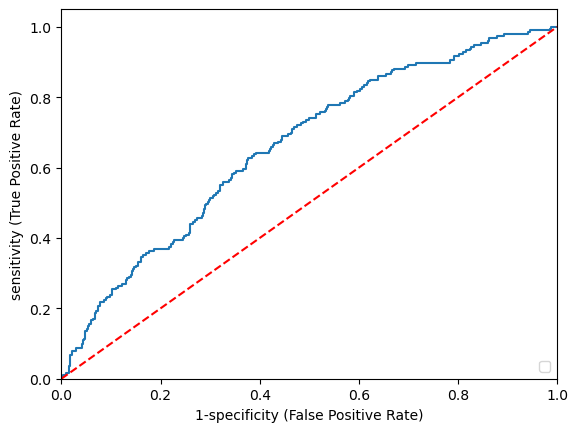

In [36]:
plt.figure()
auc_model = [   
    {
    'label' : 'CatBoost Classifier',
    'model' : CatBoostClassifier(scale_pos_weight=2,random_strength=5,learning_rate=0.03,l2_leaf_reg=1,iterations=200,depth=4,border_count=32,verbose=False,bagging_temperature=0.5),
    'auc' : 0.6258
    },
]

for algo in auc_model:
    model = algo['model']
    model.fit(X_train_smote,y_train_smote)

    #computing false positive rate and true positive rate 
    fpr, tpr, threshold = roc_curve(y_test,model.predict_proba(X_test)[:,1])

    #calculate area under the curve o display on the plot 
    plt.plot(fpr,tpr)

    #custom settings on plot 
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('1-specificity (False Positive Rate)')
    plt.ylabel('sensitivity (True Positive Rate)')
    plt.legend(loc='lower right')
    plt.savefig('auc.jpg')
    plt.show()
